In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [53]:
data = pd.read_csv("weight-height.csv")

data.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [54]:
data["Height"] = data["Height"] * 2.54
data["Weight"] = data["Weight"] / 2.205
data = data.replace(["Male", "Female"], [1, 0])
data

,Gender,Height,Weight
0,1,187.571423,109.702296
1,1,174.706036,73.610192
2,1,188.239668,96.481114
3,1,182.196685,99.792504
4,1,177.499761,93.582676
5,1,170.822660,69.030456
6,1,174.714106,83.414008
7,1,173.605229,76.177374
8,1,170.228132,79.786594
9,1,161.179495,70.929558


(array([  23.,  218.,  926., 1906., 2196., 2167., 1612.,  765.,  163.,
          24.]),
 array([137.82835865, 144.11120334, 150.39404803, 156.67689272,
        162.95973741, 169.2425821 , 175.52542679, 181.80827149,
        188.09111618, 194.37396087, 200.65680556]),
 <BarContainer object of 10 artists>)

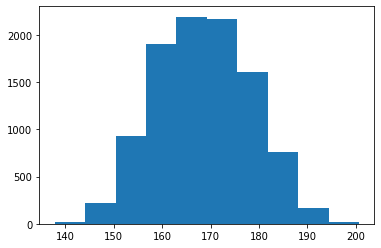

In [55]:
plt.hist(data["Height"])

(array([  15.,  278., 1241., 2175., 1849., 2016., 1747.,  598.,   71.,
          10.]),
 array([ 29.34246109,  38.65264576,  47.96283042,  57.27301508,
         66.58319974,  75.8933844 ,  85.20356906,  94.51375373,
        103.82393839, 113.13412305, 122.44430771]),
 <BarContainer object of 10 artists>)

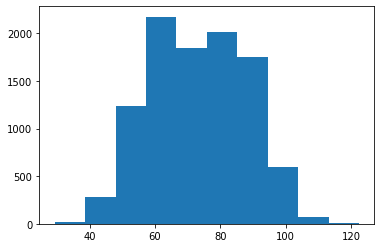

In [56]:
plt.hist(data["Weight"])

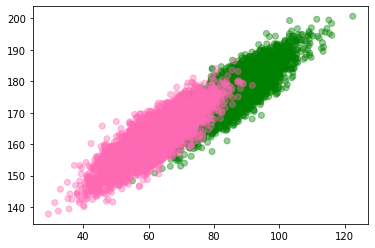

In [58]:
colors = ['hotpink', 'green']
plt.scatter(data['Weight'], data['Height'], cmap=ListedColormap(colors), c=data['Gender'], alpha=0.4)

In [59]:
X_train = np.array([data["Height"], data["Weight"]]).T
Y_train = np.array(data["Gender"])

In [60]:
class KNearestNeighbors:
    def __init__(self, k):
        self.k = k

    # train
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train

    def euclideanDistance(self, a, b):
        dis = np.sqrt(np.sum((a - b) ** 2))
        return dis

    def nearNeighbors(self, X_test):
        dists = []
        for x_train in self.X_train:
            dist = self.euclideanDistance(x_train, X_test)
            dists.append(dist)

        index_sorted = np.argsort(dists)
        gender_sorted = self.Y_train[index_sorted]
        return gender_sorted[0:self.k]

    def evaluate(self, X_test, Y_test):
        KNN_predicts = []
        for x in X_test:
            KNN_predicts.append(self.predict(x))
        correct = 0
        for i in range(len(X_test)):
            if KNN_predicts[i] == Y_test[i]:
                correct += 1
        return correct/len(Y_test)

    # test
    def predict(self, X_test):
        neighbors = self.nearNeighbors(X_test)
        Y_test = np.argmax(np.bincount(neighbors))
        return Y_test
        

In [61]:
knn = KNearestNeighbors(k=5)
knn.fit(X_train, Y_train)


X_test = np.array([81, 167])
answer = knn.predict(X_test)

answer

1

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.01, random_state=42)
knn.evaluate(x_test, y_test)

0.91